# 9장. 지리 정보 분석 (1) 주소데이터분석 + 맵

# 데이터 수집

### 데이터 파일 읽어오기

In [1]:
import pandas as pd

CB = pd.read_csv('./CoffeeBean.csv', encoding='CP949', index_col=0, header=0, engine='python')

CB.head()

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320


# 2. 데이터 준비 및 탐색

## 시/도 행정구역 이름 정규화

In [2]:
addr = []

for address in CB.address:
    addr.append(str(address).split())

# 작업 내용 확인용 출력
print('데이터 개수 : %d' % len(addr))
addr

데이터 개수 : 243


[['서울시', '강남구', '학동로', '211', '1층'],
 ['서울시', '강남구', '광평로', '280', '수서동', '724호'],
 ['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울', '강남구', '삼성동', '159', '코엑스몰', '지하2층'],
 ['서울시', '강남구', '압구정로', '46길', '3'],
 ['서울시', '서초구', '서초', '1306-3호'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '842', '압구정빌딩1층'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '테헤란로', '87길', '17', '1층'],
 ['서울시', '서초구', '서초중앙로', '118', '1층'],
 ['서울시', '강남구', '선릉로', '64길', '23', '1층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13

### - addr에서 행정구역 표준 이름이 아닌것 수정하기

In [3]:
addr2 = []

# addr에서 행정구역 표준 이름이 아닌것 수정하기
for i in range(len(addr)):
    if addr[i][0] == "서울": addr[i][0]="서울특별시"
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"

    addr2.append(' '.join(addr[i]))

addr2

['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 광평로 280 수서동 724호',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 강남구 삼성동 159 코엑스몰 지하2층',
 '서울특별시 강남구 압구정로 46길 3',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 테헤란로 87길 17 1층',
 '서울특별시 서초구 서초중앙로 118 1층',
 '서울특별시 강남구 선릉로 64길 23 1층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 12번지 1,2층',
 '서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서

In [4]:
addr2 = pd.DataFrame(addr2, columns=['address2'])

addr2

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 광평로 280 수서동 724호
2,서울특별시 강남구 논현로 566 강남차병원1층
3,서울특별시 서초구 강남대로 369 1층
4,서울특별시 강남구 삼성동 159 코엑스몰 지하2층
...,...
238,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)
239,"부산광역시 부산진구 서전로 12, 1층"
240,경기도 성남시 분당구 야탑로64 DS타워 1층
241,서울특별시 용산구 한강대로95


In [5]:
CB2 = pd.concat([CB, addr2], axis=1)

CB2.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


In [6]:
CB2.to_csv('./CoffeeBean_2.csv', encoding='CP949', index=False)

# 3. 데이터 모델링

### - 지도 정보 시각화 라이브러리 설치 및 임포트하기

In [7]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium

### 1) 숭례문 좌표를 사용하여 지도 객체 테스트하기

In [9]:
map_osm = folium.Map(location=[37.560284, 126.975334], zoom_start=16)

map_osm.save('./map.html')

### 2) 정리해둔 CoffeeBean_2.csv 파일 로드

In [10]:
CB_file = pd.read_csv('./CoffeeBean_2.csv', encoding='cp949', engine='python')

CB_file.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


### 3) 지오서비스웹(GEOSERVICE-WEB)을 사용하여 구한 GPS 좌표 파일 로드

In [11]:
CB_geoData = pd.read_csv('./CoffeeBean_location.csv', encoding='utf-8', engine='python')

len(CB_geoData)

243

In [12]:
map_CB = folium.Map(location=[37.560284, 126.975334], zoom_start=15)

In [13]:
for i, store in CB_geoData.iterrows():
    folium.Marker(location=[store['Y'], store['X']], popup=store['store'],
                    icon=folium.Icon(color='red', icon='star')).add_to(map_CB)

In [14]:
map_CB.save('./map_CB.html')

In [15]:
import webbrowser

webbrowser.open('map_CB.html')

True

# 9장. 지리 정보 분석 (2) 행정구역별 데이터 분석 + 블록맵


# 1. 데이터 준비 및 탐색

In [16]:
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment', None)

data = pd.read_csv('./공공보건의료기관현황.csv', index_col=0, encoding='CP949', engine='python')
data.head()

,의료기관명,요양종별,관계 행정기관,근거 법령,설립형태,응급지정,허가병상수,주소,홈페이지,대표전화,FAX
연번,,,,,,,,,,,
1,서울대학교병원,상급종합병원,교육부,서울대학교병원 설치법,공립(기타),권역응급의료센터,1803,서울특별시 종로구 대학로 101 (연건동),www.snuh.org,1588-5700,1588-5700
2,서울적십자병원,종합병원,대한적십자사,대한적십자사 조직법,공립(기타),지역응급의료기관,292,"서울특별시 종로구 새문안로 9, 적십자병원 (평동)",www.rch.or.kr/seoul,02-2002-8000,02-2002-8000
3,서울특별시 동부병원,종합병원,서울특별시,서울특별시 시립병원 설치 및 운영에 관한조례,공립(시군구립),지역응급의료기관,201,서울특별시 동대문구 무학로 124 (용두동),www.dbhosp.go.kr,02-920-9114,02-920-9114
4,경찰병원,종합병원,경찰청,경찰청과 그 소속기관 직제,국립,지역응급의료기관,380,"서울특별시 송파구 송이로 123, 국립경찰병원 (가락동)",www.nph.go.kr,02-3400-1114,02-3400-1114
5,한국보훈복지의료공단 중앙보훈병원,종합병원,국가보훈처,한국보훈복지의료공단법,공립(기타),지역응급의료센터,985,서울특별시 강동구 진황도로61길 53 (둔촌동),http://seoul.bohun.or.kr,02-2225-1114,02-2225-1114


## 주소에서 시도, 군구 정보 분리

In [17]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=['시도','군구'])

addr.head()

,시도,군구
0,서울특별시,종로구
1,서울특별시,종로구
2,서울특별시,동대문구
3,서울특별시,송파구
4,서울특별시,강동구


## 1) 시도 이름 확인하기

In [18]:
addr['시도'].unique()

array(['서울특별시', '부산광역시', '인천광역시', '경기도', '강원특별자치도', '충청북도', '대전광역시',
       '충청남도', '세종특별자치시', '전라북도', '광주광역시', '전라남도', '대구광역시', '경상북도',
       '경상남도', '울산광역시', '제주특별자치도'], dtype=object)

## 2) 군구 이름 확인하기

In [19]:
addr['군구'].unique()

array(['종로구', '동대문구', '송파구', '강동구', '동작구', '노원구', '중구', '중랑구', '양천구',
       '은평구', '서초구', '강북구', '강남구', '마포구', '광진구', '성동구', '관악구', '영등포구',
       '서구', '연제구', '사상구', '기장군', '북구', '해운대구', '사하구', '부산진구', '동구',
       '의정부시', '포천시', '파주시', '안성시', '고양시', '성남시', '수원시', '안산시', '이천시',
       '부평구', '연수구', '양주시', '용인시', '옹진군', '남양주시', '양평군', '구리시', '미추홀구',
       '동두천시', '여주시', '계양구', '시흥시', '화성시', '평택시', '부천시', '삼척시', '영월군',
       '원주시', '속초시', '강릉시', '춘천시', '태백시', '동해시', '홍천군', '정선군', '청주시',
       '충주시', '단양군', '제천시', '영동군', '홍성군', '공주시', '천안시', '서산시', '대덕구',
       '보듬7로', '유성구', '논산시', '서천군', '보령시', '전주시', '남원시', '군산시', '진안군',
       '정읍시', '완주군', '부안군', '고창군', '광산구', '목포시', '화순군', '순천시', '남구',
       '나주시', '강진군', '고흥군', '함평군', '장흥군', '영광군', '무안군', '진도군', '보성군',
       '여수시', '곡성군', '광양시', '장성군', '신안군', '포항시', '달서구', '안동시', '김천시',
       '상주시', '영주시', '경산시', '울진군', '수성구', '고령군', '청도군', '봉화군', '구미시',
       '경주시', '칠곡군', '의성군', '문경시', '달성군', '창원시', '진주시', '양산시', '통영시',
       '거창군', '김

## 3) 행정구역별 공공보건의료기관의 수 구하기

### (1) '시도' 와 '군구' 컬럼 결합하기

In [20]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

addr.head()

,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,종로구,서울특별시 종로구
2,서울특별시,동대문구,서울특별시 동대문구
3,서울특별시,송파구,서울특별시 송파구
4,서울특별시,강동구,서울특별시 강동구


In [21]:
addr['count'] = 0       # 의료 기관수 합계를 저장할 칼럼 만들기

addr.head()

,시도,군구,시도군구,count
0,서울특별시,종로구,서울특별시 종로구,0
1,서울특별시,종로구,서울특별시 종로구,0
2,서울특별시,동대문구,서울특별시 동대문구,0
3,서울특별시,송파구,서울특별시 송파구,0
4,서울특별시,강동구,서울특별시 강동구,0


### (2) '시도군구'를 기준으로 그룹을 만들고, 그룹별 의료기관수 합계 구하기

In [22]:
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())

addr_group.head()

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,영월군,강원특별자치도 영월군,1


### (3) 데이터 병합에 사용할 인덱스 설정하기

In [23]:
addr_group =addr_group.set_index("시도군구")

addr_group.head()

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 영월군,강원특별자치도,영월군,1


### (4) 행정구역 별 인구수 데이터 준비하기

In [44]:
population = pd.read_csv('./인구합계.csv', encoding='utf-8', engine='python')
population.head()

,시도명,시군구명,계
0,강원특별자치도,강릉시,207737
1,강원특별자치도,고성군,27027
2,강원특별자치도,동해시,87716
3,강원특별자치도,삼척시,61952
4,강원특별자치도,속초시,81025


In [45]:
population = population.rename(columns={'시도명':'시도','시군구명':'군구'})

population.head()

,시도,군구,계
0,강원특별자치도,강릉시,207737
1,강원특별자치도,고성군,27027
2,강원특별자치도,동해시,87716
3,강원특별자치도,삼척시,61952
4,강원특별자치도,속초시,81025


In [46]:
# for element in range(0,len(population)):
#     population['군구'][element] = population['군구'][element].strip()

population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
population.head()

,시도,군구,계,시도군구
0,강원특별자치도,강릉시,207737,강원특별자치도 강릉시
1,강원특별자치도,고성군,27027,강원특별자치도 고성군
2,강원특별자치도,동해시,87716,강원특별자치도 동해시
3,강원특별자치도,삼척시,61952,강원특별자치도 삼척시
4,강원특별자치도,속초시,81025,강원특별자치도 속초시


In [47]:
missing_data = population[population.isnull().any(axis=1)]
print(missing_data)


Empty DataFrame
Columns: [시도, 군구, 계, 시도군구]
Index: []


In [28]:
population['군구'] = population.apply(
    lambda row: row['읍면동명'] if pd.isnull(row['군구']) else row['군구'], axis=1
)


In [29]:
population = population[population.군구 != '소계']

In [48]:
population = population.set_index("시도군구")

population.head()

,시도,군구,계
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,207737
강원특별자치도 고성군,강원특별자치도,고성군,27027
강원특별자치도 동해시,강원특별자치도,동해시,87716
강원특별자치도 삼척시,강원특별자치도,삼척시,61952
강원특별자치도 속초시,강원특별자치도,속초시,81025


In [31]:
# '시도군구'를 기준으로 groupby 하여 '계'를 합치기
population_grouped = population.groupby('시도군구', as_index=False).agg({'계': 'sum'})

# 결과 확인
print(population_grouped)


          계
0    207737
1     27027
2     87716
3     61952
4     81025
..      ...
247  198153
248  182032
249  189207
250  284978
251  207324

[252 rows x 1 columns]


C:\Users\COM\AppData\Local\Temp\ipykernel_1368\495199104.py:2: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  population_grouped = population.groupby('시도군구', as_index=False).agg({'계': 'sum'})


### addr_group 과 population 을 인덱스 기준으로 병합

In [49]:
addr_population_merge = pd.merge(addr_group, population, how='inner', left_index=True, right_index=True)

addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,계
시도군구,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,207737
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,87716
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,61952
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,81025
강원특별자치도 영월군,강원특별자치도,영월군,1,강원특별자치도,영월군,36820


In [56]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x', 'count', '계']]

local_MC_Population.to_csv('./인구수및공공의료기관현황.csv')

In [59]:
# 컬럼 이름 변경
local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도', '군구_x':'군구', '계':'인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0)*100000
local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207737,1.925512
강원특별자치도 동해시,강원특별자치도,동해시,1,87716,1.140043
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61952,1.614153
강원특별자치도 속초시,강원특별자치도,속초시,1,81025,1.234187
강원특별자치도 영월군,강원특별자치도,영월군,1,36820,2.715915


# 바 차트 그리기

### 행정구역별 공공보건의료기관 수에 대한 바 차트를 그리기

In [34]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style

style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/windows/fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [35]:
%pip install population

Note: you may need to restart the kernel to use updated packages.


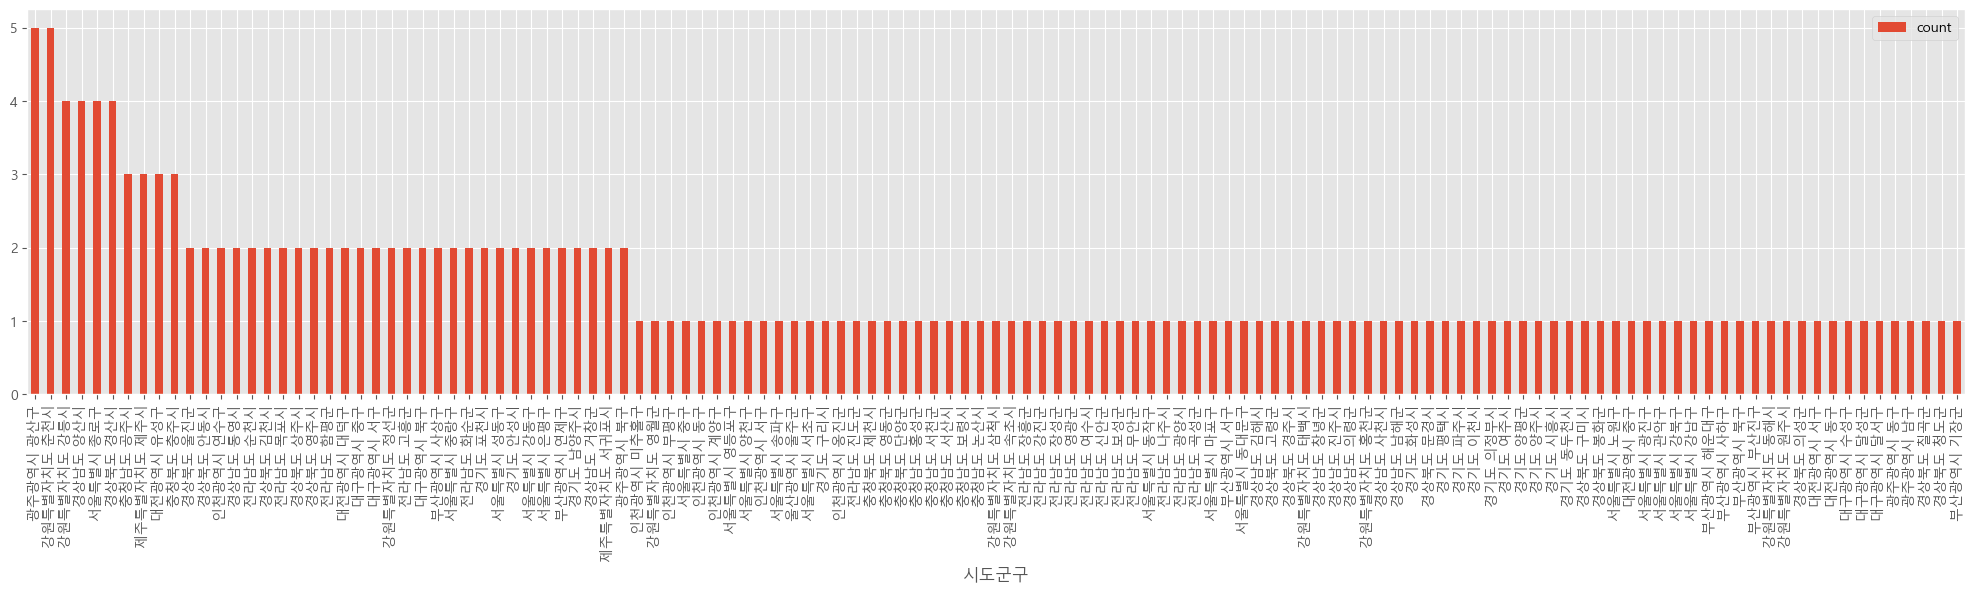

In [51]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind = 'bar', rot=90)

plt.show()

### 행정구역별로 인구수 대비 공공보건의료기관 비율에 대한 바 차트를 그리기

In [53]:
print(local_MC_Population.columns)


Index(['시도_x', '군구_x', 'count', '계'], dtype='object')


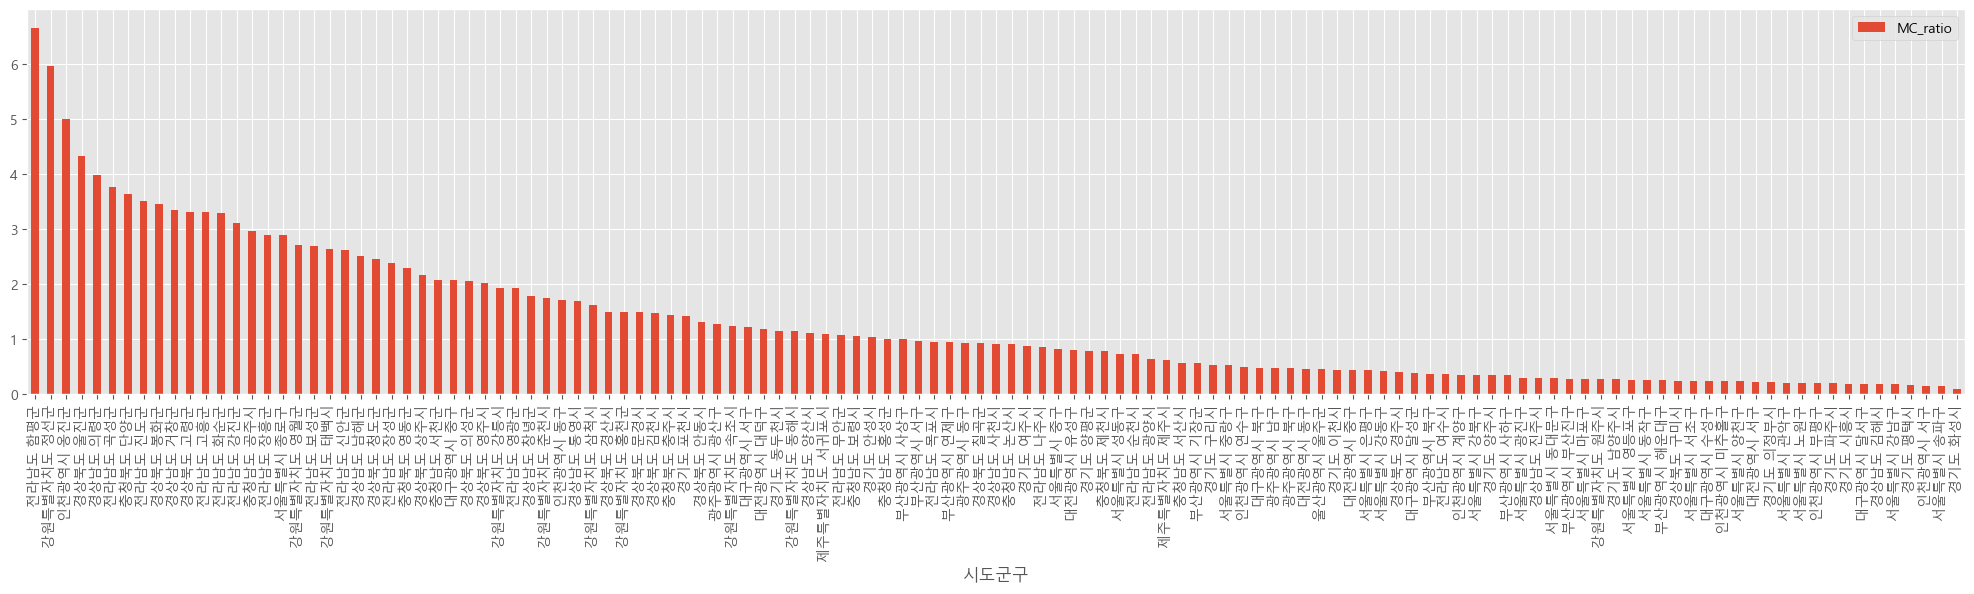

In [60]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending=False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

# 블록맵으로 시각화하기

### 1. 데이터 준비하기

In [61]:
import os
path = os.getcwd()

In [62]:
data_draw_korea = pd.read_csv('./data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### 2. 행정구역 이름 매핑하기

In [69]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

In [70]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [72]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_MC_Population, how='outer', left_index=True, right_index=True)

data_draw_korea_MC_Population_all

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,NaN,NaN,NaN,NaN,NaN
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,NaN,NaN,NaN,NaN,NaN
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,NaN,NaN,NaN,NaN,NaN
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462.0,제천,8.0,10.0,882.47,충청북도,제천시,충청북도,제천시,1.0,128725.0,0.77685
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [73]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],  # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],  # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9), (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],  # 경기도
    [(9, 12), (9, 10), (8, 10)],  # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7), (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],  # 충청북도
    [(14, 4), (15, 4), (15, 6)],  # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],  # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10), (15, 11), (14, 11), (14, 12), (13, 12)],  # 대구시
    [(15, 11), (16, 11), (16, 13)],  # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],  # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],  # 광주시
    [(18, 5), (20, 5), (20, 6)],  # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],  # 부산시
]

In [88]:
def draw_blockMap(blockedMap, targetData, title, color):
    whitelabelmin = (max(blockedMap[targetData]) - 
                     min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize = (8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData]>whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역'])<=2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
        
        # 서대문구, 서귀포시 같이 이름이 3자 이상이면 작은 글자로 표시
        if len(dispname.splitlines()[-1])>=3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight = 'bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing = linespacing)

    # 시도 경계를 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = 'black', lw=4)
    
    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')

    cb = plt.colorbar(shrink = 1, aspect = 10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig('./blockMap_' + targetData + '.png')
    plt.show()

In [85]:
data_draw_korea_MC_Population_all = (
    data_draw_korea_MC_Population_all
    .groupby(['x', 'y'], as_index=False)
    .sum()  # 또는 .sum(), 중복된 값을 처리하는 방법을 결정
)


In [86]:
duplicates = data_draw_korea_MC_Population_all.duplicated(subset=['x', 'y'])
print(data_draw_korea_MC_Population_all[duplicates])


Empty DataFrame
Columns: [x, y, 인구수_x, shortName, 면적, 광역시도, 행정구역, 시도, 군구, count, 인구수_y, MC_ratio]
Index: []


C:\Users\COM\AppData\Local\Temp\ipykernel_1368\1551099504.py:47: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink = 1, aspect = 10)


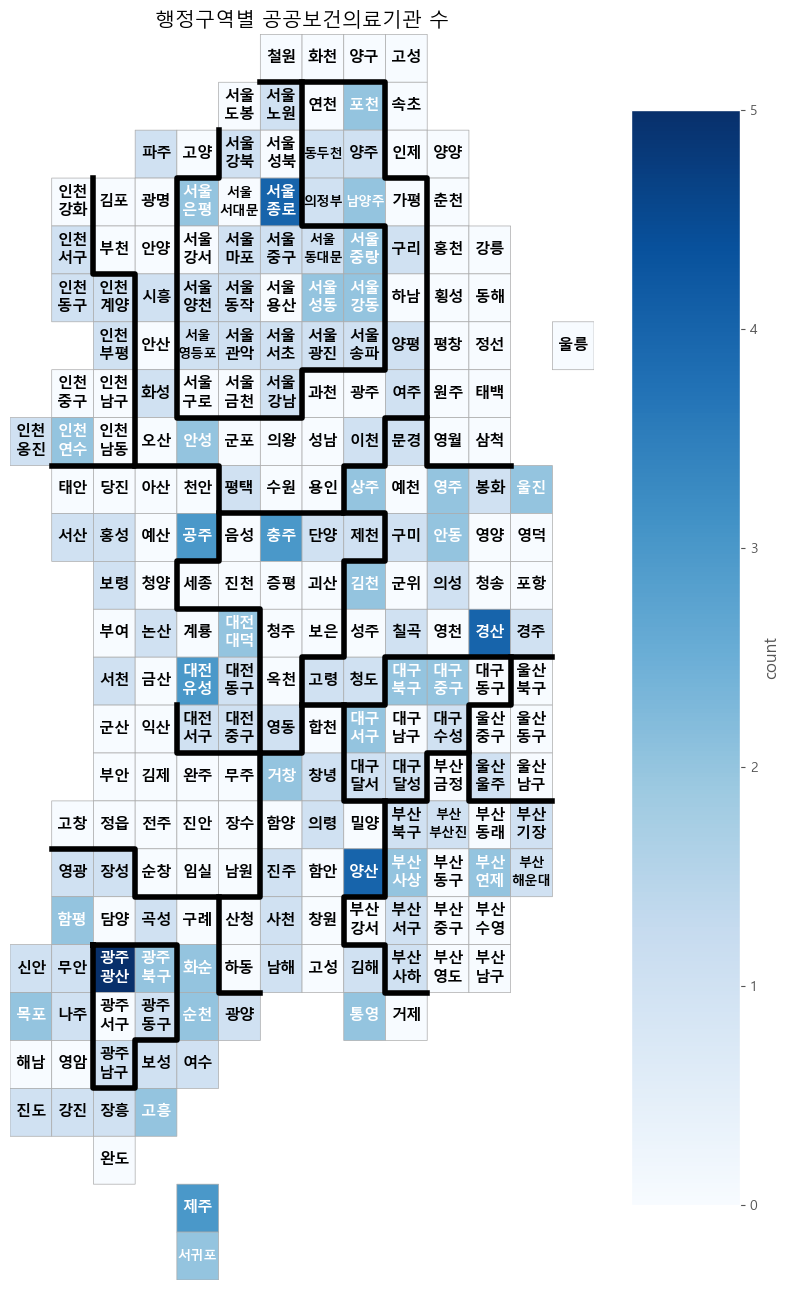

In [89]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

C:\Users\COM\AppData\Local\Temp\ipykernel_1368\1551099504.py:47: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink = 1, aspect = 10)


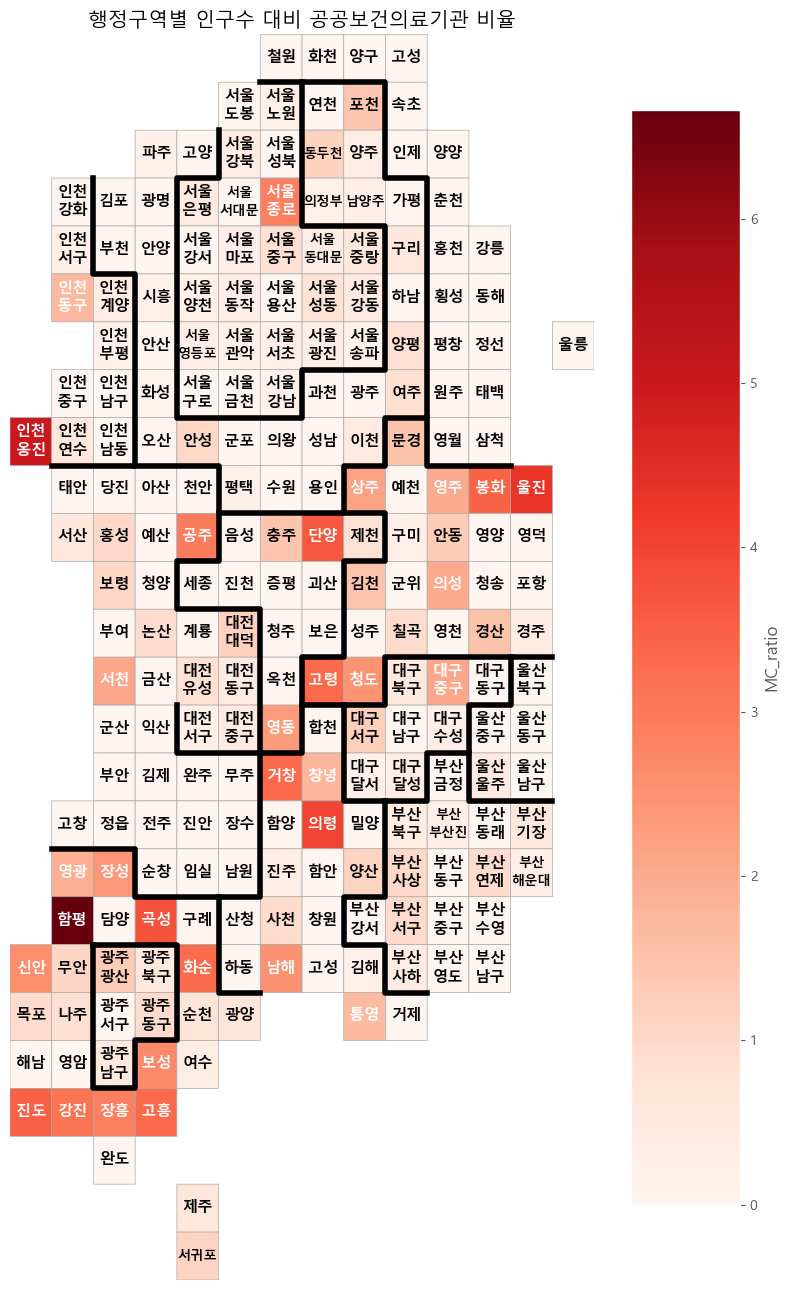

In [90]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')